In [5]:
#Do the pandas crash course first

#imports

#math imports I may use
import numpy as np
import pandas as pd 
from pandas import DataFrame
from scipy import stats
from astropy.table import Table


#matplotlib imports
import matplotlib.pyplot as plt       #this is what you need to make a plot
import matplotlib as mpl
import matplotlib.colors as mcolors    #this gives you access to the more colors
                                        #color list here: https://matplotlib.org/stable/gallery/color/named_colors.html

#only need these if your really messing arround with legends     
import matplotlib.patches as patches  
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D # For points and lines


from astropy.modeling import models
from astropy.convolution import convolve, Box2DKernel

#I made an attempt at using this at some point lets see if I actually used it
import seaborn as sns



hi
bye


In [29]:
#make sample data
sample1 = pd.DataFrame(np.random.randint(0,100,size=(200, 4)), columns=list('ABCD'))   #this makes random data frame
sample2 = pd.DataFrame(np.random.randint(0,100,size=(50, 4)), columns=list('ABCD'))   #was not shown in pandas tutorial
                                                                                       #because you probably won't need it

    

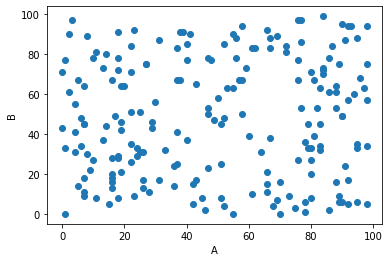

In [9]:
#basic plot

plt.scatter(sample1['A'],sample1['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Basic example')
plt.show()

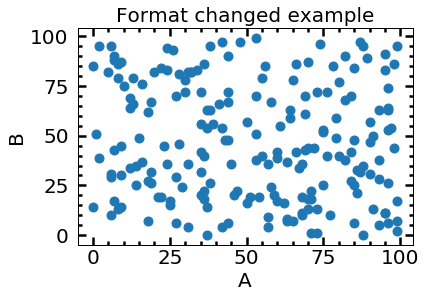

In [30]:
#plot format  most of them are self explanatory
mpl.rcParams['xtick.labelsize'] = 20    
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['axes.labelsize'] = 20   #axes size
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 9
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.minor.width'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.minor.width'] = 2.5
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.pad'] = 9
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
plt.rcParams['axes.titlesize'] = 20    #title siz
plt.rcParams.update({'font.size': 20})

plt.scatter(sample1['A'],sample1['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('Format changed example')
plt.show()

#play around with the parameters if you want to see how things change

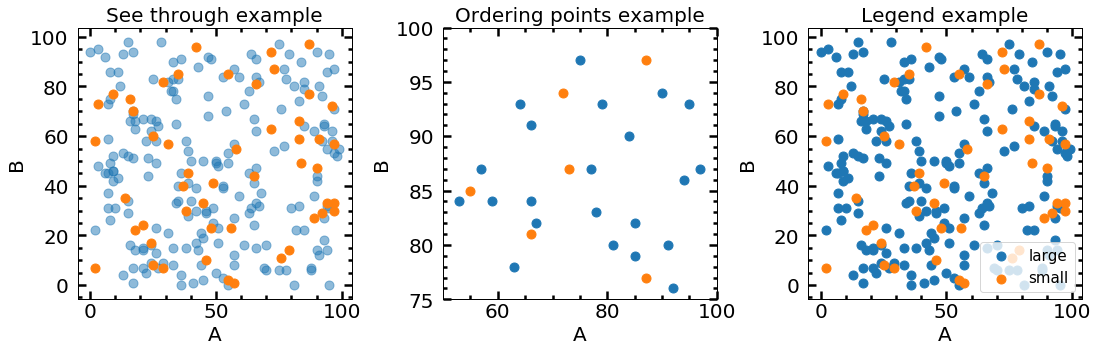

In [34]:
#To show multple plots together for different examples, I'm jumping into using gridspec or sublots to make a 
#figure more multiple panels

#these two panels will show commands all matplotlib plot types can use


grid = plt.GridSpec(nrows=5, ncols=22, wspace=0, hspace=0) 
#nrows and ncolumns is the number of rows and columns across the figure size
#wspace and hspace show space between the columns and rows

gg=plt.figure(figsize=(18,5))   #tells the code how big to make the figure, first number changes y length, second changes x length

plt.subplot(grid[0:5, 0:6])   #First two number are the rows the panel spans across, secodn pair is the number of columns


plt.scatter(sample1['A'],sample1['B'],alpha=0.5) #alpha makes the points see through by some amount
plt.scatter(sample2['A'],sample2['B'])
plt.xlabel('A')
plt.ylabel('B')
plt.title('See through example')


plt.subplot(grid[0:5,8:14])
plt.scatter(sample1['A'],sample1['B'],zorder=2) #zorder=changes which points are on the top with the higher the number on top
plt.scatter(sample2['A'],sample2['B'],zorder=1)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Ordering points example')
plt.axis([50,100,75,100])                        #lets you change the axes area 



plt.subplot(grid[0:5,16:22])
plt.scatter(sample1['A'],sample1['B'],label='large')  #label sets a lable to the points
plt.scatter(sample2['A'],sample2['B'],label='small')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Legend example')
plt.legend()                                #which can be displayed using this command

plt.show()                                   #only put plt.show() at the end of the figure

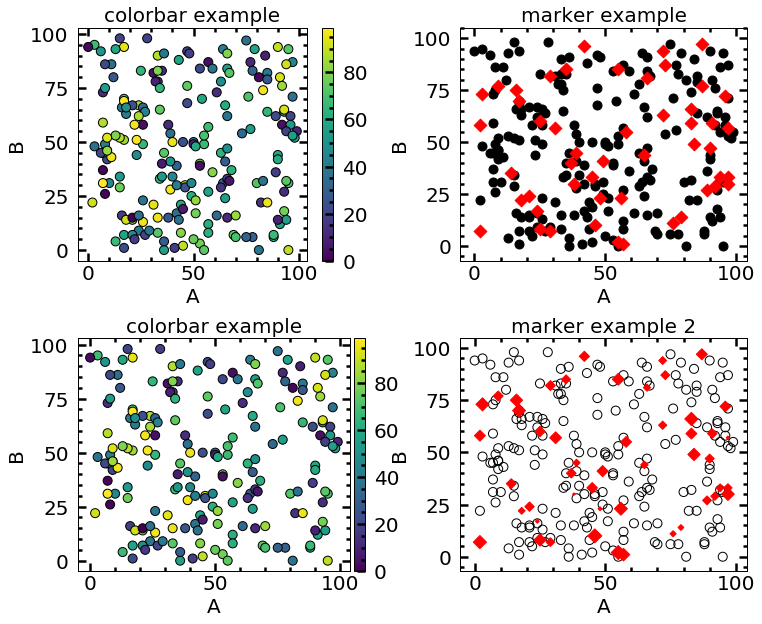

In [45]:
#Getting familiar with a scatter plot
#useful because you can set the size of the points and it's color to be a variable
#Cannot but errorbars onto the points

#website to matplotlibs scatter formating:
#https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.scatter.html


grid = plt.GridSpec(nrows=7, ncols=14, wspace=0, hspace=0) 

gg=plt.figure(figsize=(12,10))    #doubled the x length to get more of a square shaped figure



plt.subplot(grid[0:3, 0:6])
plt.scatter(sample1['A'],sample1['B'],c=sample1['D'],edgecolor='k')  #gives the points edgecolors
plt.xlabel('A')
plt.ylabel('B')
plt.title('colorbar example')
plt.colorbar()    #that color bar actually counds as part of the figure size so it shrinks the panel


plt.subplot(grid[4:7, 0:6])
plt.scatter(sample1['A'],sample1['B'],c=sample1['D'],edgecolor='k')  #gives the points edgecolors
plt.xlabel('A')
plt.ylabel('B')
plt.title('colorbar example')
#these commands make the panel not shrink but you may have to define the area the next panels lays
ax = plt.gca()
divider = make_axes_locatable(ax)
cbar=plt.colorbar(cax=divider.append_axes("right", size="4%", pad=0.05))  
         #"Right tells the code where to put the color bar
         #pad is the distance the color bar is from the panel


plt.subplot(grid[0:3, 8:14])
plt.scatter(sample1['A'],sample1['B'],c='k') # in mpl scatter plot the command to change color is c
                                            #check out the color link in the inputs cell to see a colors name
    
plt.scatter(sample2['A'],sample2['B'],c='r',marker='D')  #marker changes the marker used to plot default is a circle
plt.xlabel('A')
plt.ylabel('B')
plt.title('marker example')



plt.subplot(grid[4:7, 8:14])
plt.scatter(sample1['A'],sample1['B'],facecolor='none',edgecolor='k')  #gives the points edgecolors and makes them have no center color
plt.scatter(sample2['A'],sample2['B'],c='r',marker='D',s=sample2['C'])  #size depends on variable
plt.xlabel('A')
plt.ylabel('B')
plt.title('marker example 2')


plt.show()


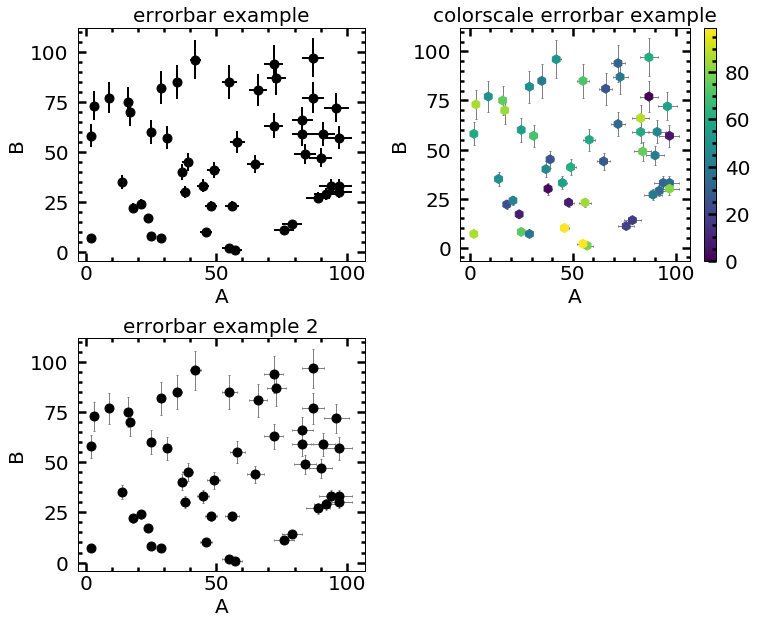

In [58]:
#Getting familiar with a errorbar plot
#can't have a colorbar or size changeing 


#link to matplotlibs errorbar formating:
#https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.errorbar.html


grid = plt.GridSpec(nrows=7, ncols=14, wspace=0, hspace=0) 

gg=plt.figure(figsize=(12,10))

plt.subplot(grid[0:3, 0:6])
plt.errorbar(sample2['A'],sample2['B'],xerr=sample2['A']/20,yerr=sample2['B']/10,fmt='o',color='k')  #fmt='o' makes it so points marker is points, basic colors (k,b,c,r) can do in fmt as well
plt.xlabel('A')
plt.ylabel('B')
plt.title('errorbar example')

plt.subplot(grid[4:7, 0:6])

plt.errorbar(sample2['A'],sample2['B'],xerr=sample2['A']/20,yerr=sample2['B']/10,color='k', marker='o',
             elinewidth=1, ecolor='gray', linestyle = 'None', capsize=1)  
    #changes errorbar witch with elinewidth                changes color of error bar with ecolor 
    #removes connecting line with linestyle                Capsize chance size at end of error bar
plt.xlabel('A')
plt.ylabel('B')
plt.title('errorbar example 2')


#to have a colorbar and error bars need to double plot
plt.subplot(grid[0:3, 8:14])
plt.errorbar(sample2['A'],sample2['B'],xerr=sample2['A']/20,yerr=sample2['B']/10,color='k', 
             elinewidth=1, ecolor='gray', linestyle = 'None', capsize=1,zorder=1)
    #for the errorbar plot just remove the fmt or marker condition to only plot error bars
    
plt.scatter(sample2['A'],sample2['B'],c=sample2['C'],marker='h',zorder=2) #plot scatter points on top 
                    #and use z order to make sure points are over errorbars
plt.xlabel('A')
plt.ylabel('B')
plt.title('colorscale errorbar example')
plt.colorbar()
plt.show()

scatter plot




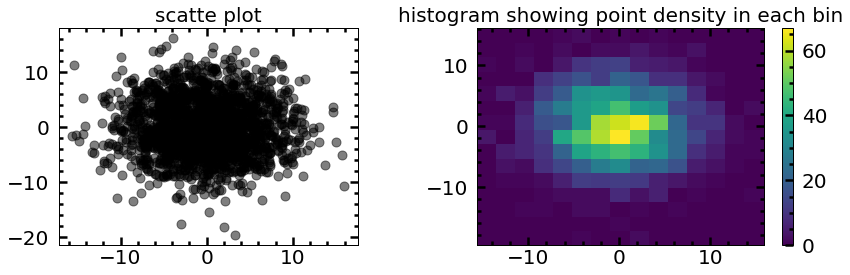

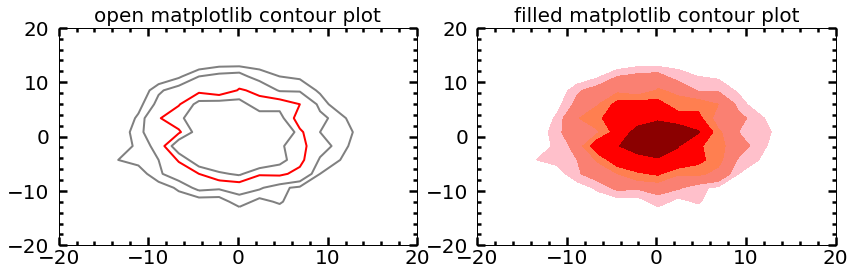

In [37]:
#countour plot using histograms and matplotlib contour plots
    #seaborn can also do something like this, but I'm not as familiar and have more control over the contours
    #this way

#formating of matplotlib contour plots:
#https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.contour.html

#formating of matplotblib filled contour plots:
#https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.contourf.html



#making good data for a contour plots
randomnorm = (np.random.normal(0, 5 , 2000))   #makes a random normal distribution around 0 with 2000 points
randPd=pd.DataFrame(randomnorm, columns=['A'])
randPd['B']=(np.random.normal(0, 5 , 2000))

#display(randPd)


#making a scatter plot just to show you what the data looks like density wise
print('scatter plot')
grid = plt.GridSpec(nrows=3, ncols=14, wspace=0, hspace=0)
gg=plt.figure(figsize=(15,4))

plt.subplot(grid[0:3, 0:5])
plt.scatter(randPd['A'],randPd['B'],c='k',alpha=0.5)
plt.title('scatte plot')
print()
print()
    
    
#using a 2D histogram you get the number of points in each bin
plt.subplot(grid[0:3, 7:13])
counts,xbins,ybins,image = plt.hist2d(randPd['A'],randPd['B'],bins=15,)  
    #bins is the number of bins along both the x and y axis (it always does a square)
plt.colorbar()
plt.title('histogram showing point density in each bin')
plt.show()
print()
print()


grid = plt.GridSpec(nrows=3, ncols=14, wspace=0, hspace=0)
gg=plt.figure(figsize=(15,4))
ax=plt.subplot(grid[0:3, 0:6])
plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2,\
        levels = [5,10,20,30],colors=['grey', 'grey', 'red','grey','grey'],zorder=10)
    #extent takes the minimum and maximum x and y values to make sure the contours are placed correctly
    #levels will draw lines to areas that contain that amount of points in it.
        #so every bin with at least 5 points in it will be circled by the outer most contour like
    #colors lets you change the color of the lines showing up
    #linewidth changes width of contour lines
plt.axis([-20,20,-20,20])
plt.title('open matplotlib contour plot')
print()
print()

plt.subplot(grid[0:3, 7:13])
plt.contourf(counts.transpose(),extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],\
       levels = [5,10,20,30,50,70,100], colors=['pink','salmon', 'coral','red','darkred'])  
    #you can fill your own colors with contourf, same formate to matplotlibs contour plots
plt.axis([-20,20,-20,20])
plt.title('filled matplotlib contour plot')
plt.show()

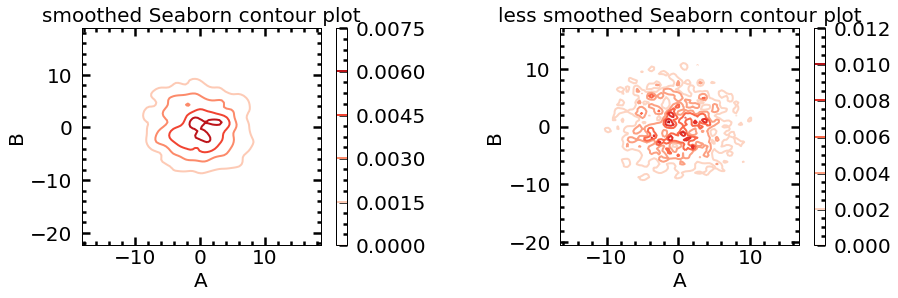

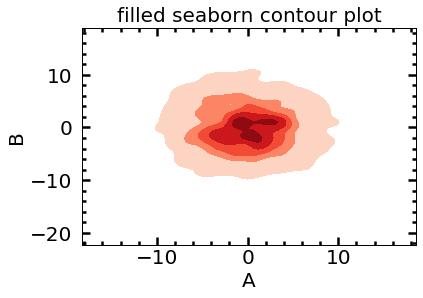

In [39]:
#making a contour plot using seaborn, I understand this significantly less but this is the information you need
#to fill in to get an actually plot


#these contours represents the probability distribution of the data values as the area under the plotted curve.
#so it's the probability a point will land somethere? I don't know I don't really use it


#link to seaborns contour plot format:
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html

grid = plt.GridSpec(nrows=3, ncols=14, wspace=0, hspace=0)
gg=plt.figure(figsize=(15,4))
plt.subplot(grid[0:3, 0:5])

cs =sns.kdeplot(randPd['A'],randPd['B'], cmap='Reds',levels=5, bw=0.9,linewidth=3,zorder=4,cbar=True)
plt.title('smoothed Seaborn contour plot')
#levels n-1 will be the number of lines you want in the contour
#bw is the smoothing parameter the closer to 1 the smoother exampel of unsmoothed below
#cbar just puts the color bar to the side 
    #I use this to figure out the levels for filled contours
print()
print()

plt.subplot(grid[0:3, 8:13])
cs =sns.kdeplot(randPd['A'],randPd['B'], cmap='Reds',levels=5, bw=0.3,linewidth=3,zorder=4,cbar=True)
plt.title('less smoothed Seaborn contour plot')
plt.show()
print()
print()


sns.kdeplot(randPd['A'],randPd['B'],cmap="Reds",shade=True,levels=[0.001,0.003,0.004,0.005,0.006,0.007],  bw=0.9,zorder=3,)
#same format to line contours, just add shade=True
#you can also manually choose your own levels, which you need to do in contour plots or the background becomes 
    #a solid color because it makes the initial bin 0 otherwise.
plt.title('filled seaborn contour plot')
plt.show()

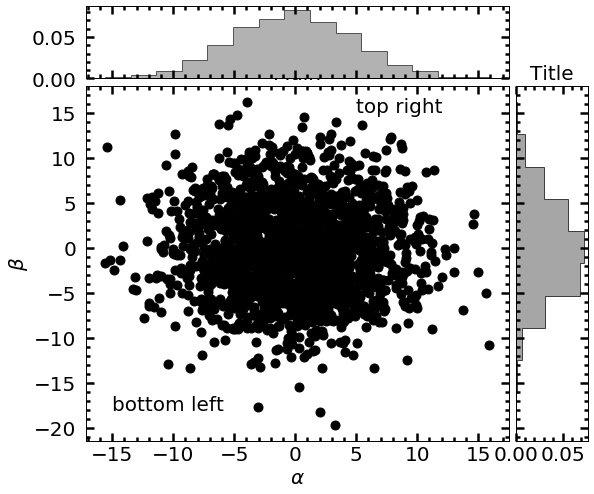

In [47]:
#Side panels for distribution


fig, ax = plt.subplots(figsize=(9,8))

ax.scatter(randPd['A'],randPd['B'], marker='o',color='black')   #plots our scattered data

plt.annotate('top right', xy=(5,15),fontsize=20)
plt.annotate('bottom left', xy=(-15,-18),fontsize=20)     #puts an annotation in the plot

plt.xlabel(r'$\alpha$')    #putting r in front of text you want to print allows you to use latex notation
plt.ylabel(r'$\beta$')     #to add symbols into the labels




divider = make_axes_locatable(ax)  
axHistx = divider.append_axes("top", 1, pad=0.1, sharex=ax)
    #defines space for another plot to the top of the main panel
    #pad changes space between the two axis
    #sharex is having it share the same axis as the main panel
axHisty = divider.append_axes("right", 1, pad=0.1, sharey=ax)


axHistx.xaxis.set_tick_params(labelbottom=False)        #removes labels on the x axis for the x histogram
axHisty.yaxis.set_tick_params(labelleft=False)   #removes labels on the y axis for the y histogram


#creates a histogam of the distribution of points along the x axis
axHistx.hist(randPd['A'], bins=15, histtype="stepfilled", color='grey', edgecolor='black', alpha=0.6, 
             density=True)

#creates a histogam of the distribution of points along the x axis
axHisty.hist(randPd['B'], bins =10, histtype="stepfilled", color='grey',
                edgecolor='black', orientation='horizontal', alpha=0.7, density=True)


plt.title('Title')

plt.show()



No handles with labels found to put in legend.


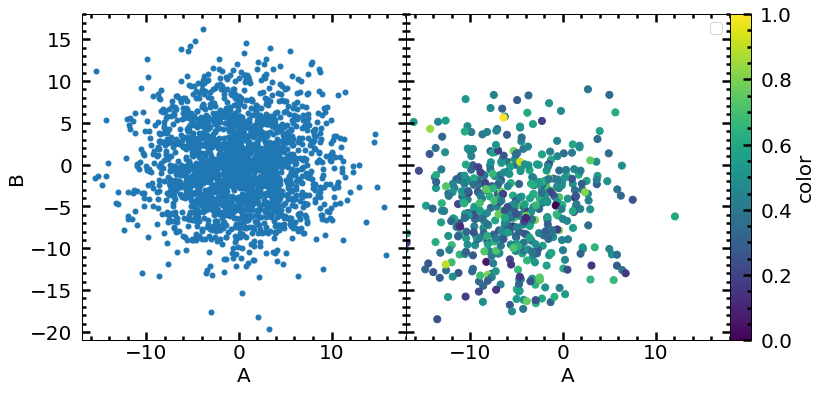

In [58]:
#shared axis figues 


#make second data set
randomnorm2 = (np.random.normal(-5, 5 , 500))   
randPd2=pd.DataFrame(randomnorm2, columns=['A'])
randPd2['B']=(np.random.normal(-5, 5 , 500))
randPd2['color']=(np.random.normal(5, 2 , 500))



#defines a figues with thrre panels with the panels defined as ax, ax1, and cax
fig, (ax, ax1, cax) = plt.subplots(ncols=3,figsize=(12,6), 
                  gridspec_kw={"width_ratios":[1.5,1.5, 0.1]})


fig.subplots_adjust(wspace=0.1) #chances the width space between the figures 



ax.scatter(randPd['A'],randPd['B'], marker='o', s = 25, ) 
#having ax out front means your plotting in the first panel


ax.set_xlim(-17,18)   #sets the x axis
ax.set_ylim(-21,18)   #sets the y axis 
ax.set_xlabel('A')
ax.set_ylabel('B')



ax1.scatter(randPd2['A'],randPd2['B'],  c=randPd2['color'], marker='o', s = 50)
#ax1 out front puts this in the second panel

ax1.set_xlim(-17,18)
ax1.set_ylim(-21,18)   #if your having a matching y axis you need to make sure it spans the same values
ax1.set_xlabel('A')

ax1.set_yticklabels([]) #removes y tick labels on the second panel



plt.subplots_adjust(wspace=0, hspace=0) #removes the spacing between the panels

cb=fig.colorbar(pt, cax=cax)  #makes the third panel the color bar
cb.set_label('color')

plt.show()